In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from figure.Geom_figures import Ellipse, Triangle, Flower, Banana
from figure.Geom_figures import Rectangle as RectFig
from PDE.Conductivity_R2.Conductivity import Conductivity
from PDE.Electric_fish.Electric_fish_ import Electric_Fish
from cfg import mconfig
from asymp.CGPT_methods import lbda, theoretical_CGPT_fast
from dict.CGPT.Invariant_descriptors import Compute_fish_Invariants_from_data, Compute_Invariants_fish, ShapeRecognition_CGPT_frequency, ShapeRecognition_CGPT_majority_voting_frequency, ShapeRecognition_PT_freq
from figure.ImageShape.Image_shape import ImgShape
from tqdm import tqdm

### Set up parameters for experimentation


In [4]:
#Set up the number of points
N = 2**8
#Set up typical size
delta = 0.3

### Define figures to include in the dictionary


In [5]:
#Create different inclusions
B1 = Ellipse(1, 1/2, phi=0.0, NbPts=N)
B2 = Triangle(1, np.pi/3, npts=N)
B3 = RectFig(1, 1/2, N)
B4 = Flower(1, 1, N, 5, 0.3, tau=0.5)  # 5 petals
B5 = Flower(1, 1, N, 19, 0.3, tau=0.95)  # 19 petals
B6 = Flower(1, 1, N, 19, 0.3, tau=0)  # 19 petals, one damaged (tau different)
B7 = ImgShape('../../Test_images/A.png', N)
B8 = ImgShape('../../Test_images/B.png', N)
B9 = ImgShape('../../Test_images/C.png', N)
B10 = ImgShape('../../Test_images/D.png', N)
B11 = ImgShape('../../Test_images/E.png', N)
B12 = ImgShape('../../Test_images/F.png', N)
B13 = ImgShape('../../Test_images/G.png', N)
B14 = ImgShape('../../Test_images/H.png', N)
B15 = ImgShape('../../Test_images/I.png', N)
B16 = ImgShape('../../Test_images/J.png', N)
B17 = ImgShape('../../Test_images/K.png', N)
B18 = ImgShape('../../Test_images/L.png', N)
B19 = ImgShape('../../Test_images/M.png', N)
B20 = ImgShape('../../Test_images/N.png', N)
B21 = ImgShape('../../Test_images/O.png', N)
B22 = ImgShape('../../Test_images/P.png', N)
B23 = ImgShape('../../Test_images/Q.png', N)
B24 = ImgShape('../../Test_images/R.png', N)
B25 = ImgShape('../../Test_images/S.png', N)
B26 = ImgShape('../../Test_images/T.png', N)
B27 = ImgShape('../../Test_images/U.png', N)
B28 = ImgShape('../../Test_images/V.png', N)
B29 = ImgShape('../../Test_images/W.png', N)
B30 = ImgShape('../../Test_images/X.png', N)
B31 = ImgShape('../../Test_images/Y.png', N)
B32 = ImgShape('../../Test_images/Z.png', N)
B33 = ImgShape('../../Test_images/Cutie_patootie.png', N)
B34 = ImgShape('../../Test_images/Bumped_in_cube.png', N)
B35 = ImgShape('../../Test_images/Bumped_out_cube.png', N)
B36 = ImgShape('../../Test_images/nuage.png', N)
Ell = Ellipse(1,1/4, 0, N)
Disk = Ellipse(1,1,0, N)
A = ImgShape('../../Test_images/A.png', N)
E = ImgShape('../../Test_images/E.png', N)
Sq = RectFig(1,1,N)
Rect = RectFig(1, 1/2, N)
Tri = Triangle(1,np.pi / 4, npts=N)
DiffE = Ellipse(1,1/3,0,N)

/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!


In [6]:
F1 = Flower(1, 1, N, 5, 0.3, tau=0)    # 5 petals, tau=0
F2 = Flower(1, 1, N, 5, 0.3, tau=0.5)    # 5 petals, tau=1
F3 = Flower(1, 1, N, 7, 0.3, tau=0)    # 7 petals, tau=0
F4 = Flower(1, 1, N, 7, 0.3, tau=0.5)    # 7 petals, tau=1
F5 = Flower(1, 1, N, 9, 0.3, tau=0)    # 9 petals, tau=0
F6 = Flower(1, 1, N, 9, 0.3, tau=0.5)    # 9 petals, tau=1
F7 = Flower(1, 1, N, 11, 0.3, tau=0)   # 11 petals, tau=0
F8 = Flower(1, 1, N, 11, 0.3, tau=0.5)   # 11 petals, tau=1

In [7]:
#Define a dictionary of shapes
Dr = [F1 * delta, F2 * delta, F3 * delta, F4 * delta, F5 * delta, F6 * delta, F7 * delta, F8 * delta]

D = [ Ell * delta, Disk*(delta/3) , A*delta, E*delta, Sq*delta, Rect*delta, Tri*delta, DiffE*delta
      , B36*delta]

C= [ 
    B1*delta , B2*delta, B3*delta, B4*delta, B5*delta, B6*delta,
      B7*delta, B8*delta, B9*delta, B10*delta, B11*delta, B12*delta, B13*delta, B14*delta, B15*delta, B16*delta,
      B17*delta, B18*delta, B19*delta, B20*delta, B21*delta, B22*delta, B23*delta, B24*delta, B25*delta, B26*delta,
      B27*delta, B28*delta, B29*delta, B30*delta, B31*delta, B32*delta, B33*delta,  B34*delta, B35*delta
]


### Define electric characteristics and testing frequencies



In [14]:
#Set conductivity and permitivitty for inclusions
cnd = 10e10 * np.ones(len(D)) 
pmtt =  1e-5 * np.ones(len(D))
""" cnd[-1] = 0.1
pmtt[-1] = 1 """
#Set up a list of working frequencies
freq = np.linspace(1,10 , endpoint=True, num=20)
freq1 = np.linspace(1,10 , endpoint=True, num=10)

### Define and plot the acquisition configuration at every step

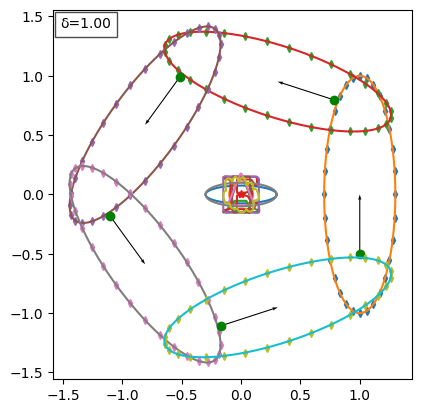

In [12]:
#Set up the fish body
Omega = Ellipse(1, 0.3, phi=0.0, NbPts=N)
Omega = Omega < np.pi / 2
#Set up specific parameters for acquisition method
idxRcv = np.arange(0, Omega.nb_points-1,2**3)
Ns = 5
impd = 0
#Set up the fish acquisition system
cfg = mconfig.Fish_circle(Omega, idxRcv, np.zeros((2,1)), 1, Ns, 2*np.pi, impd=impd, d0= np.array(([0,-1/2])) )
#Plot the configuration with the shapes
ax = plt.subplot()
cfg.plot(ax=ax)

for shape in D:
    shape.plot(ax=ax)

plt.show()


In [15]:
El = Electric_Fish([D[0]], np.array([cnd[-1]]), np.array([pmtt[-1]]), cfg, 1, drude=True)
data = El.data_simulation(freq)

### Compute the field produced by the fish


In [16]:
f_ind = 0
s = 4
z0 = np.zeros((2,1))
width = 6
N = 100
fpsi_bg = data['fpsi_bg']
fpsi = data['fpsi']
fphi = data['fphi']

field = El.calculate_field(f_ind, s, z0, width, N, fpsi_bg, fpsi, fphi)

### Plot the field


/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/PDE/Electric_fish/Electric_fish_.py:395: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = np.nanmin(data).astype(np.float64), np.nanmax(data).astype(np.float64)
/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/.venv/lib64/python3.13/site-packages/matplotlib/contour.py:1364: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/.venv/lib64/python3.13/site-packages/matplotlib/contour.py:1365: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/.venv/lib64/python3.13/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/home/ukec

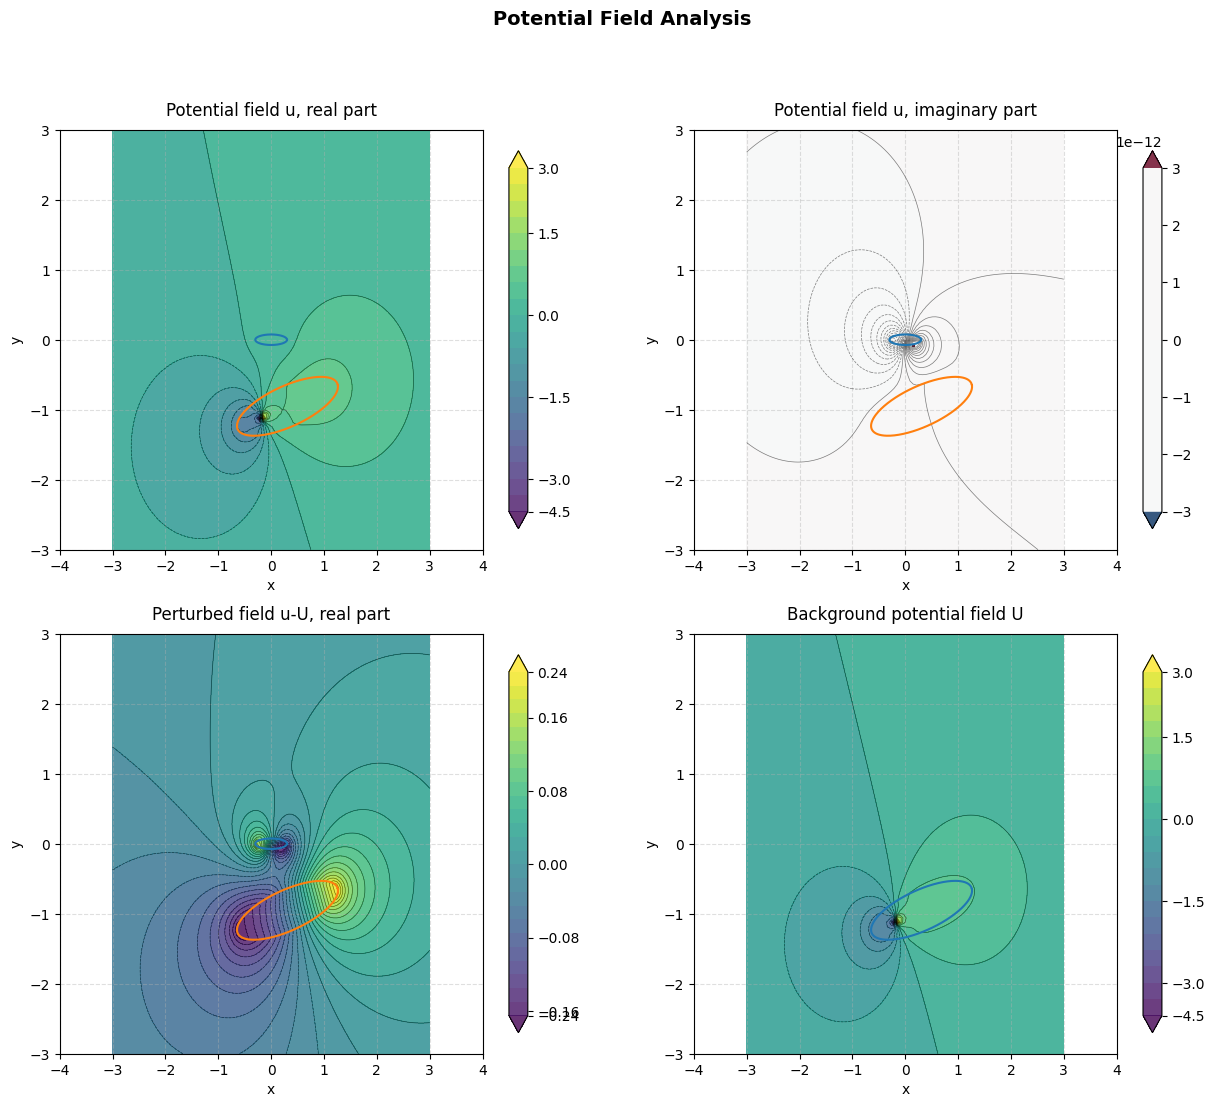

In [17]:
F = field['F']
F_bg = field['F_bg']
Sx = field['Sx']
Sy = field['Sy']
El.plot_field(s, F, F_bg, Sx, Sy, nbLine=25, subfig=True)
plt.show()

### Compute dictionary invariants


In [18]:
#Compute Invariants for the dictionary shapes

tau, mu = Compute_Invariants_fish(D, cfg, cnd, pmtt, freq, ord=1)
I1, I2 = Compute_Invariants_fish(D, cfg, cnd, pmtt, freq, ord=2)
#I11, I21 = Compute_Invariants_fish(D, cfg, cnd, pmtt, freq1, ord= 2)

Computing shapes: 100%|██████████| 9/9 [02:12<00:00, 14.78s/it]


### Define parameters for a recognition test

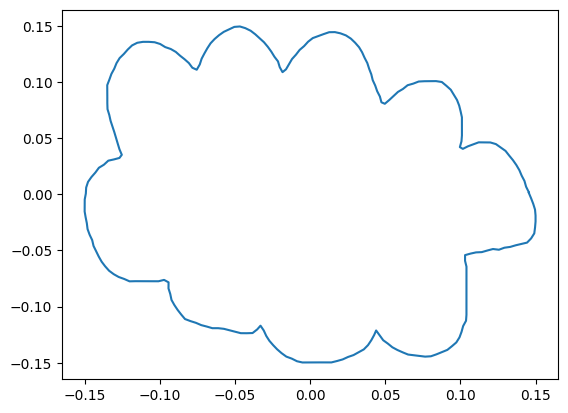

In [19]:
#Define a true index for the shape:
true_index = -1
#Generate a new shape to recognize
Bnew = (D[true_index])

#Set up parameters to perturb the shape
epsilon = 0
p = 2**5
n = 1
#Perturb the chosen shape
Bnew = Bnew.global_perturbation(epsilon, p, n)

#Plot the chose shape
axx = plt.subplot()
Bnew.plot(ax=axx)
plt.show()

In [20]:
#Define new conductivity and permitivitty values
cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])
nlvl = 0
fishP = Electric_Fish([Bnew], cnd_new, pmtt_new, cfg, stepBEM=2)
data = fishP.data_simulation(freq)
data1 = fishP.data_simulation(freq1)
#Compute the invariants of the new shape
#tau_new, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=nlvl)
tau_new, mu_new = Compute_fish_Invariants_from_data(data, ord=1, fishP=fishP, noise_level=nlvl)

#I1_new, I2_new =  Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=nlvl)
I1_new, I2_new =  Compute_fish_Invariants_from_data(data,ord=2, fishP=fishP, noise_level=nlvl)
I1_new1, I2_new1 =  Compute_fish_Invariants_from_data(data1,ord=2, fishP=fishP, noise_level=nlvl)

/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


Recognized shape index mu: 8
Recognized shape index order 2: 8
Recognized shape index majority voting 8
Votes per shape were: [ 0.  0.  0.  0.  0.  0.  0.  0. 20.]
True index: -1


<Figure size 1000x500 with 0 Axes>

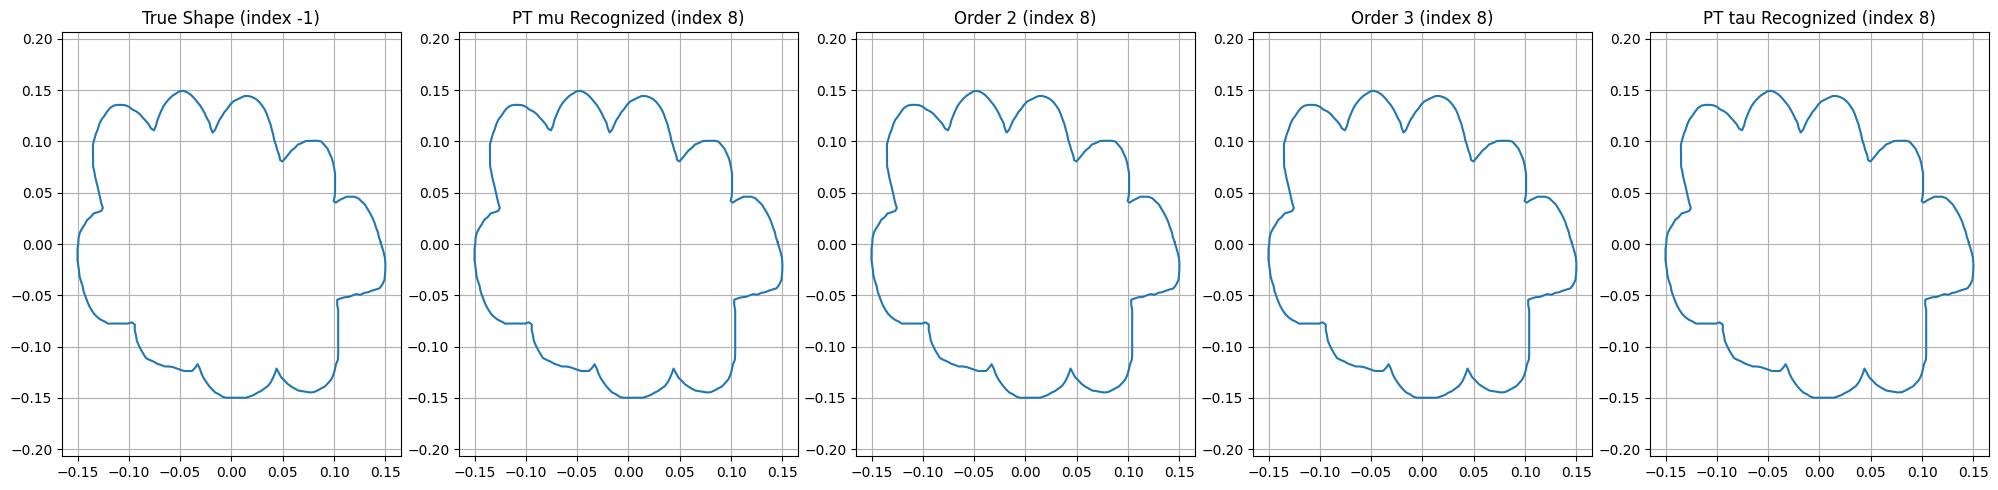

In [21]:
# Recognize the shape using different algorithms 
index_higher_order, error = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
index_maj, votes = ShapeRecognition_CGPT_majority_voting_frequency(I1, I2, I1_new, I2_new)
index = ShapeRecognition_PT_freq(mu, mu_new, 'mu')
index_tau = ShapeRecognition_PT_freq(tau, tau_new, 'tau')
#index_higher_order1, error1 = ShapeRecognition_CGPT_frequency(I1, I2, I1_new1, I2_new1)
print( "Recognized shape index mu:", index)
print( "Recognized shape index order 2:", index_higher_order)
#print("Recognized shape index order 2 and frequency 1", index_higher_order1)
print("Recognized shape index majority voting", index_maj)
print("Votes per shape were:", votes)
print("True index:", true_index)
#Plot the results
plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Plot true shape
D[true_index].plot(ax=axs[0])
axs[0].set_title("True Shape (index {})".format(true_index))

# Plot recognized shape by PT
D[int(index)].plot(ax=axs[1])
axs[1].set_title("PT mu Recognized (index {})".format(index))

# Plot recognized shape by higher order
D[int(index_higher_order)].plot(ax=axs[2])
axs[2].set_title("Order 2 (index {})".format(index_higher_order))

# Plot recognized shape by majority voting
D[int(index_maj)].plot(ax=axs[3])
axs[3].set_title("Order 3 (index {})".format(index_maj))

# Plot recognized shape by PT tau
D[int(index)].plot(ax=axs[4])
axs[4].set_title("PT tau Recognized (index {})".format(index_tau))

for ax in axs:
    ax.axis('equal')
    ax.axis('on')
    ax.grid(True)  # Add grid

plt.tight_layout()
plt.show()


### Do an experiment by adding white noise to the data matrix

In [ ]:
from collections import Counter

def recog_rate_dict(recog_list, n_trials):
    counts = Counter(recog_list)
    return {k: v / n_trials for k, v in counts.items()}

In [ ]:
import time

# Set up noise levels and number of trials
noise_levels = np.linspace(0, 1, 20)
n_trials = 1000

# Create empty dictionaries for storing results
all_success_rates_ord1 = {}
all_success_rates_ord2_freq = {}
all_success_rates_ord1_tau = {}
all_recognized_shapes_ord1 = {}
all_recognized_shapes_ord2_freq = {}
all_recognized_shapes_ord1_tau = {}

for idx in tqdm(range(len(D)), desc="True shape index"):
    true_index = idx
    cnd_new = np.array([cnd[true_index]])
    pmtt_new = np.array([pmtt[true_index]])
    success_rates_ord1 = {}
    success_rates_ord2_freq = {}
    success_rates_ord1_tau = {}
    recognized_shapes_ord1 = {}
    recognized_shapes_ord2_freq = {}
    recognized_shapes_ord1_tau = {}
    Bnew = D[true_index]
    fishP = Electric_Fish([Bnew], cnd_new, pmtt_new, cfg, stepBEM=2)
    data = fishP.data_simulation(freq)
    start = time.time()
    for noise in noise_levels:
        recog_list_ord1 = []
        recog_list_ord2_freq = []
        recog_list_ord1_tau = []
        n_success_ord1 = 0
        n_success_ord2_freq = 0
        n_success_ord1_tau = 0
        noise_start = time.time()
        
        for _ in range(n_trials):
            # Order 1 (mu)
            tau_new, mu_new = Compute_fish_Invariants_from_data(data, ord=1, fishP=fishP, noise_level=noise)
            recog_index_ord1 = ShapeRecognition_PT_freq(mu, mu_new, 'mu')
            recog_list_ord1.append(int(recog_index_ord1))
            if int(recog_index_ord1) == true_index:
                n_success_ord1 += 1

            # Order 1 (tau)
            recog_index_ord1_tau = ShapeRecognition_PT_freq(tau, tau_new, 'tau')
            recog_list_ord1_tau.append(int(recog_index_ord1_tau))
            if int(recog_index_ord1_tau) == true_index:
                n_success_ord1_tau += 1

            # Order 2, freq
            I1_new, I2_new = Compute_fish_Invariants_from_data(data, ord=2, fishP=fishP, noise_level=noise)
            recog_index_ord2_freq, _ = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
            recog_list_ord2_freq.append(int(recog_index_ord2_freq))
            if int(recog_index_ord2_freq) == true_index:
                n_success_ord2_freq += 1

        recognized_shapes_ord1[noise] = recog_rate_dict(recog_list_ord1, n_trials)
        recognized_shapes_ord1_tau[noise] = recog_rate_dict(recog_list_ord1_tau, n_trials)
        recognized_shapes_ord2_freq[noise] = recog_rate_dict(recog_list_ord2_freq, n_trials)

        success_rates_ord1[noise] = recognized_shapes_ord1[noise].get(true_index, 0.0)
        success_rates_ord1_tau[noise] = recognized_shapes_ord1_tau[noise].get(true_index, 0.0)
        success_rates_ord2_freq[noise] = recognized_shapes_ord2_freq[noise].get(true_index, 0.0)

    all_success_rates_ord1[true_index] = success_rates_ord1
    all_success_rates_ord1_tau[true_index] = success_rates_ord1_tau
    all_success_rates_ord2_freq[true_index] = success_rates_ord2_freq
    all_recognized_shapes_ord1[true_index] = recognized_shapes_ord1
    all_recognized_shapes_ord1_tau[true_index] = recognized_shapes_ord1_tau
    all_recognized_shapes_ord2_freq[true_index] = recognized_shapes_ord2_freq
    print(f'Done with {noise} trials after {noise_start-start}') #type: ignore

print("All success rates by noise level (order 1, mu):", all_success_rates_ord1)
print("All recognized shape rates by noise level (order 1, mu):", all_recognized_shapes_ord1)
print("All success rates by noise level (order 1, tau):", all_success_rates_ord1_tau)
print("All recognized shape rates by noise level (order 1, tau):", all_recognized_shapes_ord1_tau)
print("All success rates by noise level (order 2, freq):", all_success_rates_ord2_freq)
print("All recognized shape rates by noise level (order 2, freq):", all_recognized_shapes_ord2_freq)


### Plot the results to the experiment


In [ ]:
def plot_success_rates_per_shape(success_rates_dict, noise_levels, method_title="Success Rate"):
    """
    Plots the recognition success rate for each shape as a function of noise level (in percentage).

    Parameters:
        success_rates_dict (dict): Dictionary mapping shape index to {noise_level: success_rate}.
        noise_levels (array-like): List or array of noise levels (should match keys in inner dicts).
        method_title (str): Title for the plot.
    """
    num_shapes = len(success_rates_dict)
    percent_levels = np.array(noise_levels) * 100
    plt.figure(figsize=(10, 6))
    for shape_idx in range(num_shapes):
        rates = [success_rates_dict[shape_idx].get(noise, 0.0) for noise in noise_levels]
        plt.plot(percent_levels, rates, marker='o', label=f"{D[shape_idx]._name_str}")
    plt.axhline(1 / len(D), color='red', linestyle=':', linewidth=2, label='Random choice')
    plt.xlabel("Noise level (%)")
    plt.ylabel("Success rate")
    plt.title(f"Recognition Success Rate vs Noise Level\n({method_title})")
    plt.ylim(-0.05, 1.05)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_success_rates_per_shape(all_success_rates_ord1_tau, noise_levels, method_title= 'Success Rate, order 1, tau')
plot_success_rates_per_shape(all_success_rates_ord1, noise_levels, method_title= 'Success Rate ord1, mu')
plot_success_rates_per_shape(all_success_rates_ord2_freq, noise_levels, method_title="Success Rate (Order 2, Frequency)")

In [ ]:
import seaborn as sns

def plot_recognition_heatmaps_all(recognized_shapes_all, noise_levels, method_title="Recognition Heatmap"):
    """
    Plots a heatmap for each true shape index, showing which figure was picked at each noise level.
    The true shape index is highlighted with a red rectangle.

    Parameters:
        recognized_shapes_all (dict): {true_index: {noise_level: {shape_idx: rate, ...}, ...}, ...}
        noise_levels (array-like): List or array of noise levels.
        method_title (str): Title for the plot.
    """
    num_shapes = len(D)
    shape_names = [D[i]._name_str for i in range(num_shapes)]
    percent_levels = np.array(noise_levels) * 100

    for true_idx in range(num_shapes):
        # Build heatmap data: rows=noise_levels, cols=shapes, value=rate
        heatmap_data = np.zeros((len(noise_levels), num_shapes))
        recog_dict = recognized_shapes_all.get(true_idx, {})
        for i, noise in enumerate(noise_levels):
            shape_rates = recog_dict.get(noise, {})
            for shape_idx, rate in shape_rates.items():
                heatmap_data[i, shape_idx] = rate

        plt.figure(figsize=(12, 6))
        ax = sns.heatmap(
            heatmap_data,
            xticklabels=shape_names,
            yticklabels=[f"{lvl:.1f}%" for lvl in percent_levels],
            cmap="YlGnBu",
            cbar=True,
            linewidths=0.5,
            linecolor='gray',
            vmin=0, vmax=1
        )
        # Highlight the true shape index with a red rectangle
        for i in range(len(noise_levels)):
            ax.add_patch(plt.Rectangle((true_idx, i), 1, 1, fill=False, edgecolor='red', lw=2, clip_on=False)) #type: ignore
        plt.xlabel("Shape Index / Name")
        plt.ylabel("Noise Level")
        plt.title(f"{method_title}\nTrue Shape Index: {true_idx} ({shape_names[true_idx]})")
        plt.tight_layout()
        plt.show()

# Example usage for order 1 (mu)
plot_recognition_heatmaps_all(all_recognized_shapes_ord1, noise_levels, method_title="Order 1 (mu) Recognition Heatmap")

# Example usage for order 1 (tau)
plot_recognition_heatmaps_all(all_recognized_shapes_ord1_tau, noise_levels, method_title="Order 1 (tau) Recognition Heatmap")

# Example usage for order 2, frequency
plot_recognition_heatmaps_all(all_recognized_shapes_ord2_freq, noise_levels, method_title="Order 2 (freq) Recognition Heatmap")


In [6]:
from asymp.CGPT_methods import theoretical_CGPT_fast
"""
We compute theoretical CGPTs and study the influence of frequency on their frobenius norm.
"""
D = [Ell*delta]
freq = np.linspace(1,10, endpoint=True, num = 20)
freq = freq*2*np.pi
#Set up base conductivity
#Set conductivity and permitivitty for inclusions
cnd = 10e10 * np.ones(len(D)) 
pmtt =  1e-5 * np.ones(len(D))
#Set up the fish body
Omega = Ellipse(1, 0.3, phi=0.0, NbPts=N)
Omega = Omega < np.pi / 2
#Set up specific parameters for acquisition method
idxRcv = np.arange(0, Omega.nb_points-1,2**3)
Ns = 5
impd = 0.1
#Set up the fish acquisition system
acq = mconfig.Fish_circle(Omega, idxRcv, np.zeros((2,1)), 1, Ns, 2*np.pi, impd=impd, d0= np.array(([0,-1/2])) )
Fish = Electric_Fish([D[0]], np.array([cnd[0]]), np.array([pmtt[0]]), acq, 2, drude=True)
KsdS = Fish.KsdS
# Compute theoretical CGPTs
theoCGPTs = []
for f in freq:
    lam = lbda(cnd[0], pmtt=pmtt[0], freq=f)
    theoCGPTs.append( theoretical_CGPT_fast(D, KsdS,lam, ord=1) )



/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


IndexError: tuple index out of range